In [62]:
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
#load the data
data = pd.read_csv(r'C:\Users\USER\Desktop\internship\Assignment-1 Dataset.csv')

In [64]:
data['Timestamp']=pd.to_datetime(data['Timestamp'])
p = data.set_index('Timestamp',inplace = True)
df_mon = data.resample('M').size()

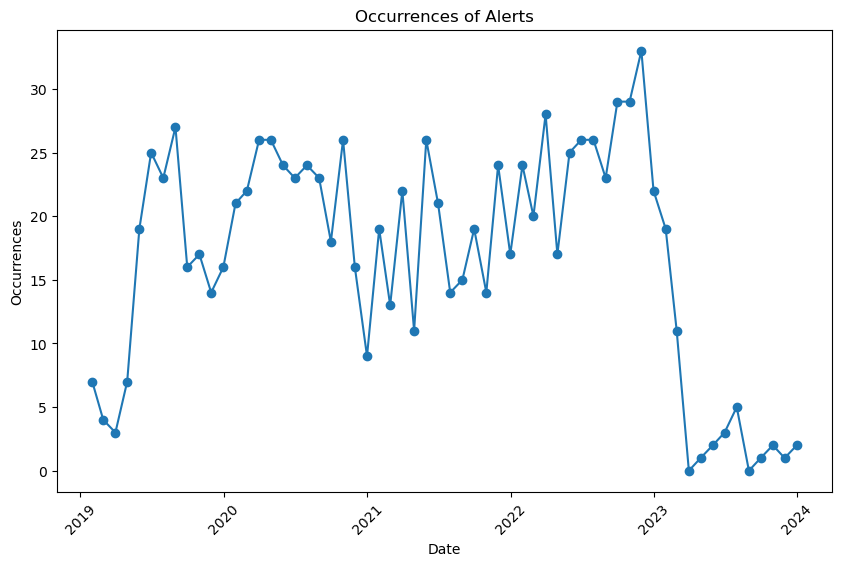

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df_mon.index, df_mon.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Occurrences')
plt.title('Occurrences of Alerts')
plt.xticks(rotation=45)
plt.show()

In [66]:
df_mon.values

array([ 7,  4,  3,  7, 19, 25, 23, 27, 16, 17, 14, 16, 21, 22, 26, 26, 24,
       23, 24, 23, 18, 26, 16,  9, 19, 13, 22, 11, 26, 21, 14, 15, 19, 14,
       24, 17, 24, 20, 28, 17, 25, 26, 26, 23, 29, 29, 33, 22, 19, 11,  0,
        1,  2,  3,  5,  0,  1,  2,  1,  2], dtype=int64)

In [67]:
import numpy as np
from scipy import stats
values = df_mon.values
z_scores = stats.zscore(values)

outliers = np.array(values)[np.abs(z_scores) > 3]

print("Outliers:")
print(outliers)


Outliers:
[]


In [68]:
z_scores

array([-1.0634775 , -1.39352225, -1.50353716, -1.0634775 ,  0.25670147,
        0.91679095,  0.69676112,  1.13682078, -0.07334328,  0.03667164,
       -0.2933731 , -0.07334328,  0.47673129,  0.58674621,  1.02680587,
        1.02680587,  0.80677604,  0.69676112,  0.80677604,  0.69676112,
        0.14668655,  1.02680587, -0.07334328, -0.84344768,  0.25670147,
       -0.40338802,  0.58674621, -0.62341785,  1.02680587,  0.47673129,
       -0.2933731 , -0.18335819,  0.25670147, -0.2933731 ,  0.80677604,
        0.03667164,  0.80677604,  0.36671638,  1.24683569,  0.03667164,
        0.91679095,  1.02680587,  1.02680587,  0.69676112,  1.35685061,
        1.35685061,  1.79691026,  0.58674621,  0.25670147, -0.62341785,
       -1.8335819 , -1.72356699, -1.61355207, -1.50353716, -1.28350733,
       -1.8335819 , -1.72356699, -1.61355207, -1.72356699, -1.61355207])

In [69]:
import numpy as np
import pandas as pd
values = df_mon.values
per = np.array(values)
q1 = np.percentile(per,25)
q3 = np.percentile(per,75)
IQR = q3-q1
low_bond = q1-1.5*IQR
up_bond = q3+1.5*IQR
outlier = per[(per<low_bond)|(per>up_bond)]
outliers

array([], dtype=int64)

In [70]:
low_bond

-9.75

In [71]:
up_bond

44.25

In [72]:
df_year = data.resample('Y').size()
df_year

Timestamp
2019-12-31    178
2020-12-31    258
2021-12-31    215
2022-12-31    302
2023-12-31     47
Freq: A-DEC, dtype: int64

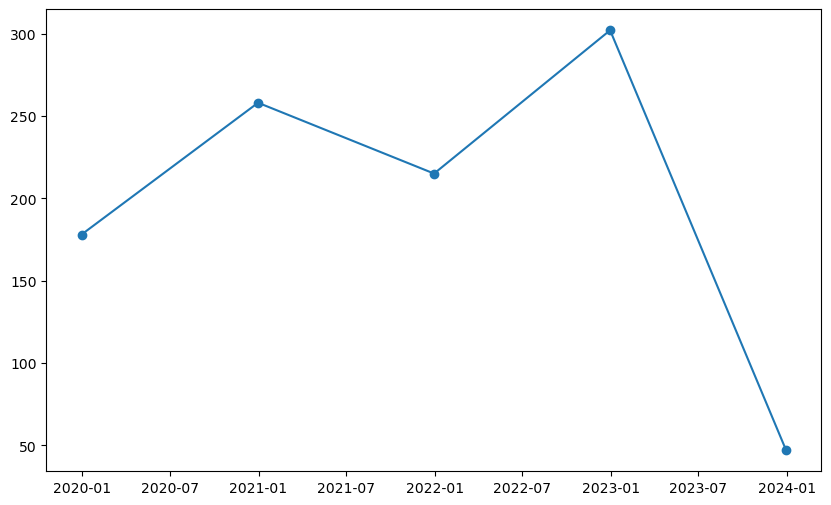

In [73]:
plt.figure(figsize=(10,6))
plt.plot(df_year.index,df_year.values,marker='o')

In [74]:
import numpy as np
from scipy import stats
values = df_year.values
z_scores = stats.zscore(values)

outliers = np.array(values)[np.abs(z_scores) > 3]

print("Outliers:")
print(outliers)


Outliers:
[]


In [42]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data['Severity']=label.fit_transform(data['Severity'])
data.head()

,Alert Id,Alert Source,Timestamp,Location,Severity,Description,Affected Component,Assigned To,Status,Priority,Resolution Notes,Escalation Level,Notifications,Labels
0,1,motherboard,12-07-2019 10:12,Denver,1,Database connection lost,Network,Mike,resolved,Low,Investigating the issue,Level 4,Email sent to stakeholders,critical
1,2,CPU,26-06-2021 07:26,IN,0,Server down,Server,Emily,in progress,High,Working on the fix,Level 4,Email sent to stakeholders,important
2,3,hard drive,05-11-2020 20:55,San Francisco,2,Unauthorized access attempt,Software,John,open,Medium,Investigating the issue,Level 2,Letter mailed to stakeholders,high priority
3,4,GPU,25-10-2020 18:17,TX,1,Memory usage exceeded threshold,Database,Sara,resolved,High,Fix deployed,Level 1,SMS sent to stakeholders,high priority
4,5,router,13-04-2020 06:25,Dallas,0,Unauthorized access attempt,Application,John,resolved,NaN,Working on the fix,Level 1,SMS sent to stakeholders,low priority


In [43]:
data['Timestamp']=pd.to_datetime(data['Timestamp'])
data['Timestamp']=data['Timestamp'].apply(lambda x: x.timestamp())
data['Timestamp']

0      1.575714e+09
1      1.624692e+09
2      1.589230e+09
3      1.603650e+09
4      1.586759e+09
           ...     
995    1.656585e+09
996    1.630614e+09
997    1.604878e+09
998    1.617835e+09
999    1.573916e+09
Name: Timestamp, Length: 1000, dtype: float64

In [49]:
from sklearn.ensemble import IsolationForest
# Select the relevant columns for anomaly detection
columns = ['Timestamp', 'Severity']
# Prepare the data for anomaly detection
X = data[columns]

# Initialize the Isolation Forest model
model = IsolationForest(contamination=0.01)  # Adjust the contamination parameter as per your requirement

# Fit the model to the data
model.fit(X)

# Predict the anomalies
predictions = model.predict(X)

# Add the anomaly predictions to the original dataset
data['IsAnomaly'] = predictions

# View the dataset with the anomaly predictions
print(data)


     Alert Id  Alert Source     Timestamp       Location  Severity  \
0            1  motherboard  1.575714e+09         Denver         1   
1            2          CPU  1.624692e+09             IN         0   
2            3   hard drive  1.589230e+09  San Francisco         2   
3            4          GPU  1.603650e+09             TX         1   
4            5       router  1.586759e+09         Dallas         0   
..         ...          ...           ...            ...       ...   
995        996         case  1.656585e+09   Jacksonville         0   
996        997          CPU  1.630614e+09             NY         2   
997        998          RAM  1.604878e+09             AZ         2   
998        999          RAM  1.617835e+09             CA         1   
999       1000        modem  1.573916e+09             NC         2   

                         Description Affected Component  Assigned To  \
0           Database connection lost             Network        Mike   
1              

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [50]:
anomaly = data[data['IsAnomaly']==-1]

In [51]:
anomaly.shape

(10, 15)

In [55]:
data['Severity'].unique()

array([1, 0, 2])

In [56]:
data['Severity'].value_counts()

0    347
1    330
2    323
Name: Severity, dtype: int64